데이터 시각화 양식

양식의 순서는 지키되 참고만 하고 자유롭게 더하거나 빼서 분석하세요.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

In [9]:
# 파일 불러오기
df = pd.read_csv('2022-06-29_last_bab.csv')
# dtype -> datetime으로 바꾸기 
df['completed_at'] = pd.to_datetime(df['completed_at'])

In [117]:
# 첫번째 열 드롭
df.drop(columns='Unnamed: 0', inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              101102 non-null  int64         
 1   id                      101102 non-null  int64         
 2   customer_id             101102 non-null  int64         
 3   course_id               101102 non-null  int64         
 4   type                    101102 non-null  object        
 5   state                   101102 non-null  object        
 6   course_title            101102 non-null  object        
 7   category_title          101102 non-null  object        
 8   format                  101102 non-null  object        
 9   completed_at            101102 non-null  datetime64[ns]
 10  transaction_amount      101102 non-null  int64         
 11  coupon_title            101102 non-null  object        
 12  coupon_discount_amount  101102

# 매출 분석

In [28]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND'], dtype=object)

In [35]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

총매출 구하기 : type = payment & refund / state = completed

In [120]:
# payment & completed
pay_com = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]
pay_com

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,marketing_start_at,Year,Month,Day,Hour,Weekday,m-d,day_of_week,month_year,quarter
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,2021-03-04 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,2019-11-14 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,2020-12-02 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,2020-11-27 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,2021-02-02 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101094,1364969,669238,204286,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,...,2021-04-23 00:00:00,2021,9,25,13,Saturday,0925,38,2021-09,2021Q3
101095,1364976,384003,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,...,2020-12-02 00:00:00,2021,9,25,13,Saturday,0925,38,2021-09,2021Q3
101096,1364991,670891,203935,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,...,2021-05-31 00:00:00,2021,9,25,14,Saturday,0925,38,2021-09,2021Q3
101099,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,...,2021-06-15 00:00:00,2021,9,25,14,Saturday,0925,38,2021-09,2021Q3


In [123]:
# refund & completed
re_com = df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]
re_com

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,marketing_start_at,Year,Month,Day,Hour,Weekday,m-d,day_of_week,month_year,quarter
645,972377,444760,204122,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,...,2018-11-11 00:00:00,2021,3,29,9,Monday,0329,13,2021-03,2021Q1
646,972381,472666,203178,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,...,2020-12-02 00:00:00,2021,3,29,9,Monday,0329,13,2021-03,2021Q1
660,972409,447177,203989,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,...,2021-02-19 00:00:00,2021,3,29,9,Monday,0329,13,2021-03,2021Q1
666,972422,373915,204264,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,...,2021-03-08 00:00:00,2021,3,29,9,Monday,0329,13,2021-03,2021Q1
669,972436,456086,300000,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,...,2018-11-11 00:00:00,2021,3,29,9,Monday,0329,13,2021-03,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,...,2021-07-15 00:00:00,2021,9,24,14,Friday,0924,38,2021-09,2021Q3
100870,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,...,2018-11-11 00:00:00,2021,9,24,14,Friday,0924,38,2021-09,2021Q3
100895,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,...,2021-08-17 00:00:00,2021,9,24,16,Friday,0924,38,2021-09,2021Q3
100933,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,...,2021-08-17 00:00:00,2021,9,24,17,Friday,0924,38,2021-09,2021Q3


In [126]:
com_Pay_Re = pd.concat([pay_com,re_com])
com_Pay_Re

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,marketing_start_at,Year,Month,Day,Hour,Weekday,m-d,day_of_week,month_year,quarter
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,2021-03-04 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,2019-11-14 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,2020-12-02 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,2020-11-27 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,2021-02-02 00:00:00,2021,3,28,15,Sunday,0328,12,2021-03,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,...,2021-07-15 00:00:00,2021,9,24,14,Friday,0924,38,2021-09,2021Q3
100870,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,...,2018-11-11 00:00:00,2021,9,24,14,Friday,0924,38,2021-09,2021Q3
100895,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,...,2021-08-17 00:00:00,2021,9,24,16,Friday,0924,38,2021-09,2021Q3
100933,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,...,2021-08-17 00:00:00,2021,9,24,17,Friday,0924,38,2021-09,2021Q3


In [127]:
#총매출
com_Pay_Re['transaction_amount'].sum()

5972719534

총 매출 = 5,972,719,534원

## 시간대, 요일, 일, 주, 월, 분기, 총 매출(반기), 6개월간 추이

In [13]:
#year(연도) 컬럼 추가
df['Year'] = df['completed_at'].dt.year 

In [14]:
#month(월) 컬럼 추가
df['Month'] = df['completed_at'].dt.month

In [15]:
#day(일) 컬럼 추가
df['Day'] = df['completed_at'].dt.day

In [16]:
#hour(시간)컬럼추가
df['Hour'] = df['completed_at'].dt.hour

In [17]:
df

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour
0,0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,...,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00,2021,3,28,15
1,1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,...,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00,2021,3,28,15
2,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,...,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15
3,3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,...,0,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15
4,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,...,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101097,101813,1364995,640697,205365,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,...,20000,116000,INICIS,TRANS,영상 편집,2021-06-15 00:00:00,2021,9,25,14
101098,101814,1364998,670896,204159,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,...,0,189000,INICIS,CARD,부동산 개발,2021-02-10 00:00:00,2021,9,25,14
101099,101815,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,...,20000,116000,INICIS,VBANK,영상 편집,2021-06-15 00:00:00,2021,9,25,14
101100,101816,1365005,670896,204159,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,...,0,189000,INICIS,CARD,부동산 개발,2021-02-10 00:00:00,2021,9,25,14


### 시간대별 매출 그래프

#### 시간대별 count 그래프

<AxesSubplot:xlabel='Hour', ylabel='count'>

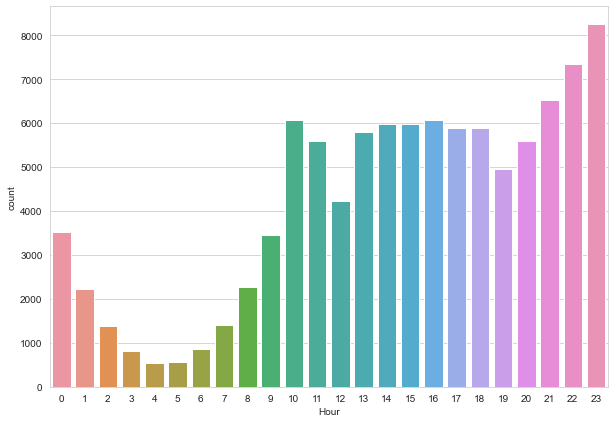

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Hour")

In [128]:
sum_hour = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
sum_hour

,transaction_amount
completed_at,
0,233549455
1,136075550
2,95817755
3,52194135
4,33338600
5,36766265
6,55248680
7,94951875
8,155896900


<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

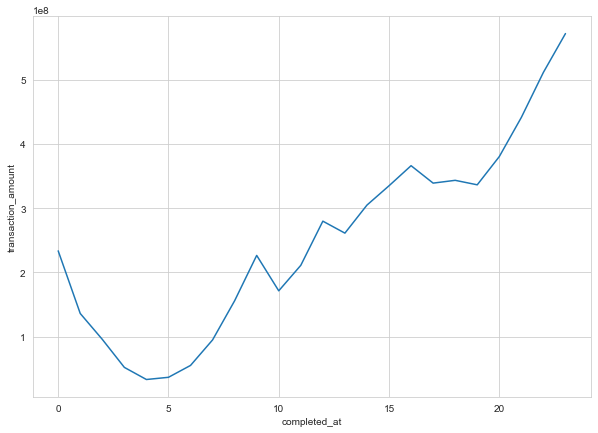

In [132]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.lineplot(data=sum_hour, x="completed_at", y ='transaction_amount')

### 요일별 매출 그래프

In [26]:
df['Weekday'] = df['completed_at'].dt.day_name()

In [143]:
sum_week = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.day_name()).sum()[['transaction_amount']]
sum_week.sort_index(ascending=True)

,transaction_amount
completed_at,
Friday,819967968
Monday,794476420
Saturday,737461545
Sunday,1149664615
Thursday,708513498
Tuesday,859965425
Wednesday,902670063


<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

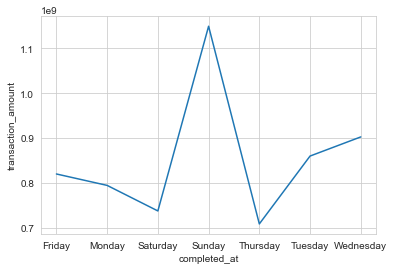

In [138]:
sns.lineplot(data=sum_week, x='completed_at', y='transaction_amount')

<AxesSubplot:xlabel='Weekday', ylabel='count'>

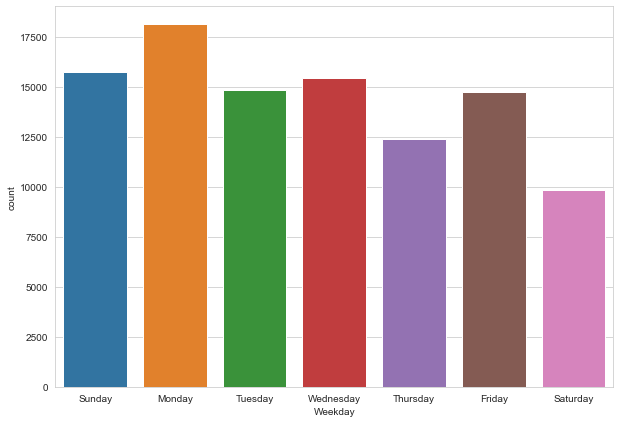

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Weekday")

### 일별 매출 그래프

필요없을듯!

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

In [144]:
sum_day = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.day).sum()[['transaction_amount']]
sum_day.sort_index(ascending=True)

,transaction_amount
completed_at,
1,120656529
2,136319725
3,132405593
4,178228365
5,141387104
6,165539322
7,154945359
8,165210479
9,177890909


<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

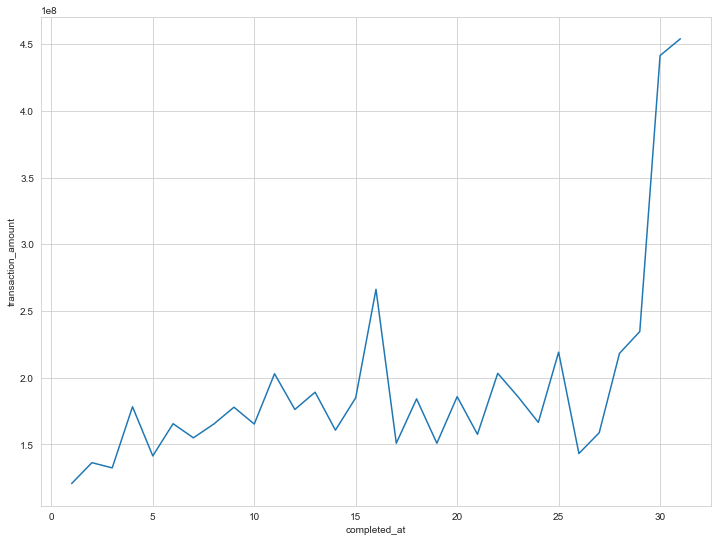

In [146]:
plt.figure(figsize=(12,9))
sns.lineplot(data=sum_day, x='completed_at', y='transaction_amount')

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN s

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN s

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN s

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot:xlabel='m-d'>

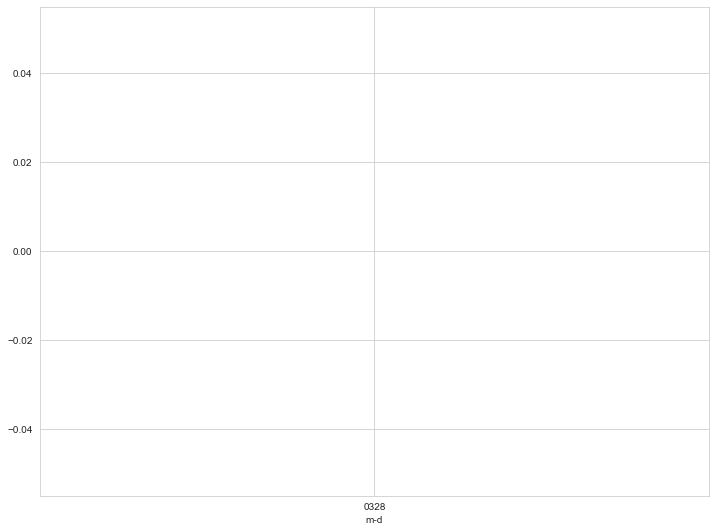

In [56]:
plt.figure(figsize=(12,9))
sns.lineplot(data=df, x="m-d")
# sns.countplot(data=df, x="Day")

### 주별 매출 그래프

In [36]:
df['day_of_week'] = df['completed_at'].dt.week

/var/folders/mb/9mp8sm994p9c0708gn3gmss40000gn/T/ipykernel_21444/1793591100.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['day_of_week'] = df['completed_at'].dt.week


In [151]:
sum_sweek = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.week).sum()[['transaction_amount']]
sum_sweek.sort_index(ascending=True)

/var/folders/mb/9mp8sm994p9c0708gn3gmss40000gn/T/ipykernel_21444/2766562886.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sum_sweek = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.week).sum()[['transaction_amount']]


,transaction_amount
completed_at,
12,36101770
13,280902095
14,174836172
15,180461592
16,172120121
17,283422726
18,178097029
19,209188129
20,184205414


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

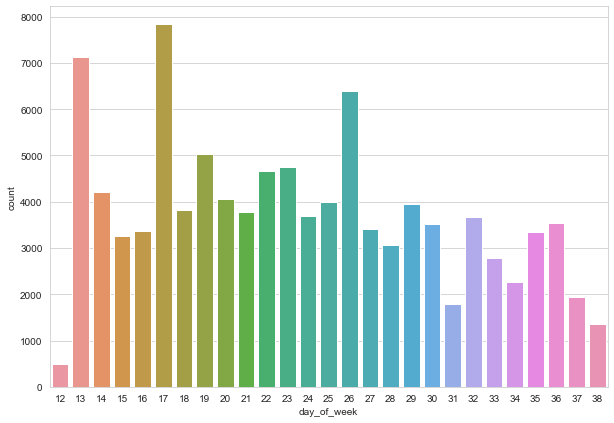

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(data=sum_sweek, x="completed_at", y)
# sns.countplot(data=df, x="day_of_week")

### 월별 매출 그래프

In [38]:
#make year&month cols 
df['month_year'] = pd.to_datetime(df['completed_at']).dt.to_period('M')

In [78]:
# df

<AxesSubplot:xlabel='month_year', ylabel='count'>

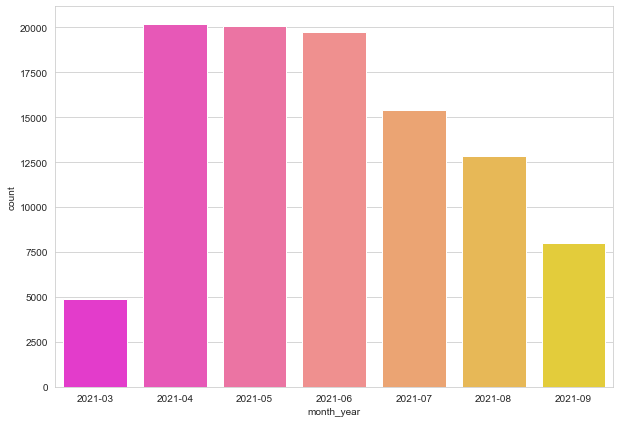

In [39]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
plt.xticks(rotation = 0)
sns.countplot(data=df, x='month_year', palette='spring')

### 분기별 매출 그래프

In [40]:
df['quarter'] = df['completed_at'].dt.to_period('Q')

In [196]:
# df

<AxesSubplot:xlabel='quarter', ylabel='count'>

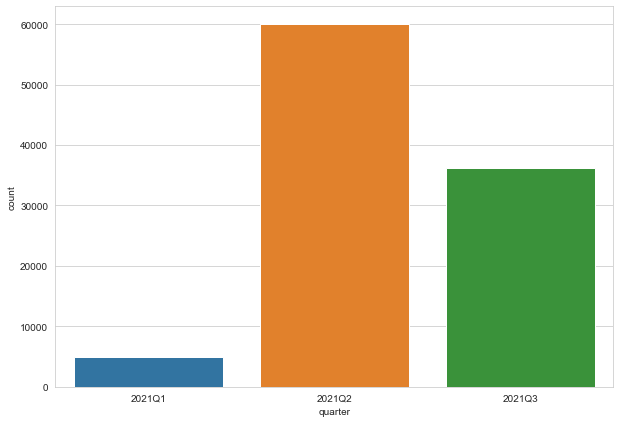

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="quarter")

### 6개월(반기) 총매출 그래프

In [51]:
# sns.lineplot(data=sum_hour, x='tracsaction_amount')

# 강의 분석

In [86]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,day_of_week,Weekday
0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,...,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00,2021,3,28,15,12,Sunday
1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,...,COMM,CARD,영상 편집,2020-12-02 00:00:00,2021,3,28,15,12,Sunday
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15,12,Sunday
3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15,12,Sunday
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,COMM,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15,12,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101097,1364995,640697,205365,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,...,INICIS,TRANS,영상 편집,2021-06-15 00:00:00,2021,9,25,14,38,Saturday
101098,1364998,670896,204159,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,...,INICIS,CARD,부동산 개발,2021-02-10 00:00:00,2021,9,25,14,38,Saturday
101099,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,...,INICIS,VBANK,영상 편집,2021-06-15 00:00:00,2021,9,25,14,38,Saturday
101100,1365005,670896,204159,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,...,INICIS,CARD,부동산 개발,2021-02-10 00:00:00,2021,9,25,14,38,Saturday


## 전체 강의 수

In [85]:
len(df['course_title'].unique())

610

## 전체 카테고리 수

In [69]:
# df['course_title'].unique()

In [97]:
# df

## 가장많은(적은) 매출을 올린 강의 및 탑 10강의 매출추이

In [ ]:
# sum_sweek = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.week).sum()[['transaction_amount']]
# sum_sweek.sort_index(ascending=True)

In [96]:
course = df[['course_title', 'transaction_amount']]
cou_des = course.sort_values('transaction_amount')
cou_des.head(10)

,course_title,transaction_amount
100489,프로모션 : iOS 개발 맥북 pro 패스(9월 현물 프리패스),-1800000
100601,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),-1800000
100493,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),-1800000
100542,프로모션 : 영상그래픽 디자인 맥북 pro 패스(9월 현물 프리패스),-1800000
100566,프로모션 : 직장인 필수 스킬 맥북 pro 패스(9월 현물 프리패스),-1800000
100621,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),-1800000
100572,프로모션 : iOS 개발 맥북 pro 패스(9월 현물 프리패스),-1800000
100803,프로모션 : 콘텐츠 마케터 맥북 pro 패스(9월 현물 프리패스),-1800000
100467,프로모션 : 부동산 재테크 맥북 pro 패스 (9월 현물 프리패스) - 수정,-1800000
100462,프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스),-1800000


### 매출 상위 1~10위 까지의  강의  목록 

In [114]:
#course_title 확인하기
course_title =  df['course_title'].unique()
course_title

array(['올인원 패키지 : 알고리즘 기술면접 완전 정복', '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집',
       '시크릿코드 : 프론트엔드 실무 완성편', '올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX',
       '프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스)',
       '올인원 패키지 : 기업가치 평가와 M&A 전략 실무',
       '올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장)',
       '프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스)',
       '초격차 패키지 : 한 번에 끝내는 프론트엔드 개발', '매주)서비스 기획서 완성 온라인 완주반 2101',
       '프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스)',
       'The RED : 현실 세상의 TDD by 이규원', '올인원 패키지 : 마디아의 UX/UI 포트폴리오',
       '올인원 패키지 : 100억을 움직이는 단 10장의 PPT', '올인원 패키지 : 프론트엔드 (React)',
       '연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+',
       '초격차 패키지 : 한번에 끝내는 모션그래픽', '[한정판매] 자연어 A-Z 끝장 패키지(~3월)',
       '올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문', 'THE RED : 광고인 박웅현과 크리에이티브',
       '데이터분석 프로젝트+자격증 온라인 완주반 3기',
       '프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스)',
       '올인원 패키지 : 디지털 마케팅 MAX 2020', '초격차 패키지 : 한번에 끝내는 PPT 제작/디자인',
       '프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스)', '프론트엔드 개발자 되기 온라인 완주반 

돌아오기

In [163]:
sum_cour_list = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['course_title'])
x = sum_cour_list.sum()
course_title_desc = x.sort_values(ascending=False)
co_10 = course_title_desc.]head(10)
co_10

course_title
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법           151049741
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                      141248845
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략    129821723
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                      116614335
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터           108576441
나의 칼퇴치트키 엑셀유치원                                    88201167
초격차 패키지 : 한번에 끝내는 디자인 툴                           87700764
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                   84763815
올인원 패키지 : 완전정복 시각디자인 기초                           82131657
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                       80602968
Name: transaction_amount, dtype: int64

<AxesSubplot:xlabel='course_title', ylabel='transaction_amount'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python

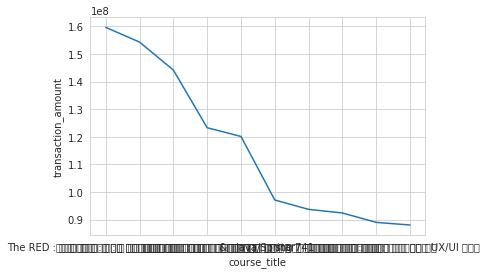

In [161]:
sns.lineplot(data=co_10)

In [66]:
course_len = df['course_title'].value_counts()
course_head = course_len.head(10)
course_head

초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                           3252
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                                2745
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                                           2526
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                                2124
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                                       1633
초격차 패키지 : 한번에 끝내는 디자인 툴                                               1588
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin                      1439
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential    1425
초격차 패키지 : 한 번에 끝내는 엑셀 실무                                              1405
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                                    1370
Name: course_title, dtype: int64

In [ ]:
sns.countplot

In [54]:
course_list = []
# for i in course_title:
cour_uni = pd.DataFrame(data = [i for i in course_title])

,0
0,올인원 패키지 : 알고리즘 기술면접 완전 정복
1,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집
2,시크릿코드 : 프론트엔드 실무 완성편
3,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX
4,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스)
...,...
605,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스)
606,프로모션 : 게임 디자인 맥북 air 패스(9월 현물 프리패스)
607,프로모션 : 데이터 분석 맥북 air 패스(9월 현물 프리패스)
608,프로모션 : 실전 기업투자 맥북 air 패스(9월 현물 프리패스)


In [63]:
course = df[['course_title', 'transaction_amount']]
cou_des = course.sort_values('transaction_amount')
cou_des.head(10)

,course_title,transaction_amount
100489,프로모션 : iOS 개발 맥북 pro 패스(9월 현물 프리패스),-1800000
100601,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),-1800000
100493,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),-1800000
100542,프로모션 : 영상그래픽 디자인 맥북 pro 패스(9월 현물 프리패스),-1800000
100566,프로모션 : 직장인 필수 스킬 맥북 pro 패스(9월 현물 프리패스),-1800000
100621,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),-1800000
100572,프로모션 : iOS 개발 맥북 pro 패스(9월 현물 프리패스),-1800000
100803,프로모션 : 콘텐츠 마케터 맥북 pro 패스(9월 현물 프리패스),-1800000
100467,프로모션 : 부동산 재테크 맥북 pro 패스 (9월 현물 프리패스) - 수정,-1800000
100462,프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스),-1800000


### 매출 상위 1~10위 강의 매출 추이 그래프(6개월간)

### 매출 하위 1~10위 강의목록

### 매출 하위 1~10위 강의 매출 추이 그래프(6개월간)

## 가장많은(적은) 매출을 올린 카테고리 탑 10카테고리 매출추이

### 매출 상위 1~10위 까지의  카테고리  목록

### 매출 상위 1~10위 카테고리 매출 추이 그래프(6개월간)

### 매출 하위 1~10위 카테고리목록

### 매출 하위 1~10위 카테고리 매출 추이 그래프(6개월간)

# 수강 신청 행동 패턴 분석

## cancelled 가장 많은 강좌(구매가 많은게 환불이 많은가? 주의)

In [ ]:
x = sum_cour_list.sum()
course_title_desc = x.sort_values(ascending=False)
co_10 = course_title_desc.]head(10)
co_10

In [166]:
# cancel_list = com_Pay_Re['state'].groupby(com_Pay_Re['course_title'])
# x= cancel_list.sum()
# x

In [107]:
df[['state', 'course_title']]

,state,course_title
0,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복
1,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집
2,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편
3,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편
4,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX
...,...,...
101097,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기
101098,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가
101099,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기
101100,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가


### 취소가 많은  1~20위 까지의  강의  목록(cancelled)

### 취소가 가장 적은 1~20위 강의 목록

### 환불이 많은  1~20위 까지의  강의  목록(refund)

### 환불률이 가장 적은 1~20위 강의 목록

### 구매률과 환불률의 상관관계

# PG사 목록

## 기존 PG사 vs 신규 pg사 점유율 현황

In [98]:
df['pg'].unique()

array(['COMM', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

### 기존 PG사 vs 신규 pg사 기간별 점유율 변동 변화추이

# VIP그룹 분석

## VIP 그룹 정의

## 일반 고객 평균 결제 횟수 vs VIP 고객 평균 결제 횟수

## VIP 그룹 특징

# 쿠폰 사용 분석

## 전체구매건 중 쿠폰사용한 구매비율

## 매출에 대한 쿠폰의 중요도 분석

# 패키지 강의 vs 단품 강의

In [99]:
# df

# 레드는 과연 성공했는가?

In [ ]:
df['']